<a href="https://colab.research.google.com/github/isdeniz/results-2406/blob/main/model_msc_bug_enhc_oos_preprocessing_nlbse22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers==4.40.2

In [2]:
pip install simpletransformers==0.64.3

In [3]:
import transformers
>>> transformers.__version__

'4.40.2'

In [4]:
import pandas as pd
from functools import partial
import sklearn
import torch
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import datetime
from sklearn.metrics import confusion_matrix # additional line
import seaborn as sns # additional line
import matplotlib.pyplot as plt # additional line
import torch.multiprocessing # additional line
import os # additional line
os.environ["TOKENIZERS_PARALLELISM"] = "false" # additional line
torch.multiprocessing.set_start_method('spawn', force = True) # additional line
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
torch.multiprocessing.set_sharing_strategy('file_system')
cuda_available = torch.cuda.is_available()
print("Is cuda available?", cuda_available)

Is cuda available? True


load and prepare data

In [5]:
train = pd.read_csv('data/train_bug_ench_oos_nlbse22_preprocessing_200.csv')
test = pd.read_csv('data/test_bug_ench_oos_nlbse22_preprocessing_200.csv')
print('Number of issues: ', train.shape, test.shape)

Number of issues:  (171392, 2) (19044, 2)


In [6]:
train.head()

,text,labels
0,time 2019-11-11T20:22:40Z author CONTRIBUTOR repo Anuken/Mindustry title proper ime input method editor support body platform android ios mac windows linux windows 10 build the build number under the title in the main menu. required. 99.6 issue explain your issue in detail. when trying to chat in chinese the input method bar is missing. the bar is usually looks like however it's not shown in the chat and other places. image https user images.githubusercontent.com 822628 68618154 98d8f580 047d 11ea 9b3f 29f179506636.png i think it's a common issue for function ime and it's might be an issue of the engine https github.com anuken arc blob master arc core src io anuke arc scene ui textfield.java not the game itself. steps to reproduce how you happened across the issue and what you were doing at the time. enable any input method on windows 10 try type in text inputs in the game.,3
1,time 2020-03-05T18:43:40Z author CONTRIBUTOR repo Anuken/Mindustry title need help finding where ui.picker.show comes from body in lightblock.java https github.com anuken mindustry blob master core src mindustry world blocks power lightblock.java there is ui.picker.show what file does this come from? asking so i can figure out how to make a custom dialogue that is similar with scripting,3
2,time 2020-03-15T17:44:05Z author CONTRIBUTOR repo Anuken/Mindustry title community vote for translations body some translations are false so you should add a vote to approve or disapprove the changes in the concerned community for exemple if there is a new translation to russian russian people will vote and if the majority agree with the changes bundle will be updated but else it won't,3
3,time 2017-12-14T03:51:41Z author OWNER repo Anuken/Mindustry title localization checklist body this will be a separate checklist for setting up localization. libgdx i18bundle documentation link https github.com libgdx libgdx wiki internationalization and localization x add i18bundle variable to control vars class set up appropriate way to fetch text easily x set up assets directory for text files x create basic test bundle and get 'fetching' working x make i18bundle work with all ui x make i18bundle work with all block descriptions and extended descriptions x make i18bundle work with map names ? x remove short descriptions if possible and replace them with something else x transcribe all ingame text to i18bundle strings x translate to french contact omicron translation team x translate to russian already found a translator who is willing or i can even do it myself x translate to german,3
4,time 2020-04-27T09:54:42Z author CONTRIBUTOR repo Anuken/Mindustry title new jdk version support body despite feature request issue template saying to post suggestions in the other repo i decided to post this here. the point mindustry doesn't support jdk 8 causing developers who use newer jdk install jdk 8 to compile the game. it will be nice to make mindustry support jdk 8. the purpose many java developers use newer jdk's i.e. 11 so they must load and install jdk 8 to build the game although they are not really want to. sometimes you couldn't build the game even with the jdk 8 installed as mentioned in issue . also 8th java version is slowly going out of support so the game could lose some contributors using newer jdk's. some linux distros doesn't even have java 8 or lower in their repos. so fixing the incompability will allow to build the project with jdk 11 but no backwards compability will be lost you will be able to build the project with jdk 8 . the solution after doing some research i found out that,3


In [7]:
test.head()

,text,labels
0,time 2019-03-05T09:30:17Z author NONE repo OpenAPITools/openapi-generator title swift4 update alamofire dependency body the current alamofire dependency for swift is 4.7.0 and the current stable version is 4.8.1 with 5.0 in beta . the major issue with the current dependency is the use of deprecated synax in the request extension located in responseserilization.swift along with use of 'let' properties that are implicitly 'final' and should use 'public' instead of 'open' in a multitude of components causing compiler warnings see attached screenshot . suggested fix the alamofire dependency should be updated to the latest stable version optionally monitoring updates to avoid similar problems in the future. screenshot 2019 03 05 at 10 19 08 https user images.githubusercontent.com 10880165 53794493 665f1c00 3f30 11e9 88e0 a816b33623d5.png,1
1,time 2020-11-02T15:27:17Z author NONE repo Anuken/Mindustry title when controlling a weapon you have an aneurysm body platform android ios mac windows linux android build the build number under the title in the main menu. required. latest is not a version i need the exact build number of your game. build issue issue explain your issue in detail. when i hop into a weapon by double tapping it shakes around weirdly. oddly it fixes once i shoot with it. steps to reproduce how you happened across the issue and what exactly you did to make the bug happen. fly to a weapon double tap it it'll shake as if having an aneurysm. function to function used the mod repositories or zip files that are related to the issue if applicable. no mods save file the zipped save file you were playing on when the bug happened. this is required for any issue happening in game regardless of whether you think it happens everywhere. do not delete or omit this line unless you are sure that the issue does not happen in game. https drive.google.com file d 1iuh0afxmqk4hu6gfcnsbdsmd12umrxre,0
2,time 2014-05-10T08:37:34Z author NONE repo spring-projects/spring-boot title spring boot tools launchedurlclassloader geturls returns invalid jar file urls on windows body i have a spring boot 1.0.0.rc3 application with an embedded jetty 9.1.0.v20131115 . when trying to start on windows while on linux works normally i get this exception on jetty webappcontext startup java.net.urisyntaxexception illegal character in opaque part at index 11 while debugging i noticed that the urls returned from function on line 97 of org.eclipse.jetty.webapp.webinfconfiguration are in this format note the single backslash jar file c path_to_jar.jar webapp i could workaround the problem by extending webinfconfiguration changing line 110 from containeruris i new uri function .replaceall 20 to containeruris i new uri function .replaceall 20 .replace ' ' ' ' and webappcontext ctx new function ctx.setconfigurationclasses new string au.com......myembeddedwebinfconfiguration ... default classes ... is jar file c path_to_jar.jar webapp a valid url at all? shouldn't it be with escaped backslashes or forward slashes?,0
3,time 2021-11-11T10:08:24Z author NONE repo apache/pulsar title how to debug pulsar protocol handler in the local development environment? body i added some code in aop and wanna test and debug it. is the only way to test my code is through pulsar start a standalone broker and load the plugin ? how to debug pulsar protocol handler such as aop kop in my local dev environment ide ?,2
4,time 2020-11-06T15:47:07Z author NONE repo facebook/react-native title using adjustsfontsizetofit prop when nesting text elements doesn't allow different font sizes on ios body description we are using the adjustsfontsizetofit prop. in some places we want to display numeric values but with different font sizes and want them to scale at the same if one or both of the values get too large. on android this is working perfectly well but on ios the nested text elements ignore different fontsize values. interestingly if the font actually has to be resized the nested

Removing to-be-checked issues

In [8]:
train = train[train['labels'] != 3]
train = train.reset_index(drop = True)
train.shape[0]

154359

In [9]:
test = test[test['labels'] != 3]
test = test.reset_index(drop = True)
test.shape[0]

17151

set the classification layer and training parameters

In [10]:
lr = 3e-5
drp = 0
epochs = 4
batch_t = 100
batch_e = 100
max_seq = 200
name = 'roberta'
ver = 'roberta-base'
output_name = 'outputs/' + name

def create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq):
    model_args = ClassificationArgs()
    model_name = name
    model_version = ver
    model_args.learning_rate = lr
    model_args.num_train_epochs = epochs
    model_args.eval_batch_size = batch_t
    model_args.train_batch_size = batch_e
    model_args.max_seq_length = max_seq
    # model_args.n_gpu = 2 below line is added since this line (original) uses 2 GPUs but we have 1
    model_args.n_gpu = 1
    model_args.output_dir = output_name +'/'
    model_args.overwrite_output_dir = True
    model_args.reprocess_input_data = True
    model_args.preprocess_inputs = True
    model_args.save_steps = -1
    model_args.save_model_every_epoch = False

    model = ClassificationModel(model_name, model_version, args = model_args,
                                num_labels = 3,
                                use_cuda=cuda_available)

    return model

define evaluation metrics

In [11]:
def calc(p1, p2, func, **kwargs):
    return func(p1, p2, **kwargs)

metrics_recom = {
    "accuracy": partial(calc,func=sklearn.metrics.accuracy_score) ,
    "p_micro": partial(calc,func=sklearn.metrics.precision_score,average='micro'),
    "p_macro": partial(calc,func=sklearn.metrics.precision_score,average='macro'),
    "p_w": partial(calc,func=sklearn.metrics.precision_score,average='weighted'),
    "r_micro": partial(calc,func=sklearn.metrics.recall_score,average='micro'),
    "r_macro": partial(calc,func=sklearn.metrics.recall_score,average='macro'),
    "r_w": partial(calc,func=sklearn.metrics.recall_score,average='weighted'),
    "f_micro": partial(calc,func=sklearn.metrics.f1_score,average='micro'),
    "f_macro": partial(calc,func=sklearn.metrics.f1_score,average='macro'),
    "f_w": partial(calc,func=sklearn.metrics.f1_score,average='weighted'),
    "classificationReport": partial(calc,func=sklearn.metrics.classification_report, output_dict=True)
}

train the model

In [12]:
model = create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq)
start = datetime.datetime.now()
print('-'*5,  name, ', start time:',
datetime.datetime.strftime(datetime.datetime.today(), '%d/%m/%Y-%H:%M'), '-'*5)
model.train_model(train_df=train, **metrics_recom)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'clas

----- roberta , start time: 22/06/2024-21:30 -----


  0%|          | 0/154359 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1544 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1544 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1544 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1544 [00:00<?, ?it/s]

(6176, 0.40486815202151244)

evaluate the model

In [13]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results, model_outputs, wrong_pred = model.eval_model(test, verbose=True, **metrics_recom)
results

----- roberta , duration is: 0h:23m:10s ----- 




  0%|          | 0/17151 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/172 [00:00<?, ?it/s]

{'mcc': 0.7651128690832116,
 'accuracy': 0.8495714535595592,
 'p_micro': 0.8495714535595592,
 'p_macro': 0.840042705697995,
 'p_w': 0.850858746968944,
 'r_micro': 0.8495714535595592,
 'r_macro': 0.8438885549285579,
 'r_w': 0.8495714535595592,
 'f_micro': 0.8495714535595592,
 'f_macro': 0.8415743690195486,
 'f_w': 0.8497710695420898,
 'classificationReport': {'0.0': {'precision': 0.8268974700399467,
   'recall': 0.8768090363572185,
   'f1-score': 0.8511221517903033,
   'support': 5666},
  '1.0': {'precision': 0.8028014281790716,
   'recall': 0.8036843552378333,
   'f1-score': 0.8032426490794174,
   'support': 3637},
  '2.0': {'precision': 0.8904292188749666,
   'recall': 0.8511722731906218,
   'f1-score': 0.8703583061889251,
   'support': 7848},
  'accuracy': 0.8495714535595592,
  'macro avg': {'precision': 0.840042705697995,
   'recall': 0.8438885549285579,
   'f1-score': 0.8415743690195486,
   'support': 17151},
  'weighted avg': {'precision': 0.850858746968944,
   'recall': 0.8495714

get the confusion matrix

In [14]:
model_outputs_df = pd.DataFrame(model_outputs, columns = ['bug', 'enhancement', 'out-of-scope'])
model_outputs_df.head()

,bug,enhancement,out-of-scope
0,0.294922,1.053711,-0.801270
1,4.800781,-2.445312,-2.585938
2,1.234375,-1.116211,-0.227417
3,-0.668945,-0.205811,1.192383
4,-0.125122,-3.796875,3.675781


In [15]:
def get_prediction(row):
  max_value = row.max()
  if max_value == row['bug']:
    return 0
  elif max_value == row['enhancement']:
    return 1
  elif max_value == row['out-of-scope']:
    return 2

In [16]:
model_outputs_df['prediction'] = model_outputs_df.apply(get_prediction, axis = 1)
model_outputs_df.head()

,bug,enhancement,out-of-scope,prediction
0,0.294922,1.053711,-0.801270,1
1,4.800781,-2.445312,-2.585938,0
2,1.234375,-1.116211,-0.227417,0
3,-0.668945,-0.205811,1.192383,2
4,-0.125122,-3.796875,3.675781,2


In [17]:
model_outputs_df['actual'] = test['labels']

In [19]:
label_names = ['bug', 'enhancement', 'out-of-scope']

In [20]:
predicted_labels = model_outputs_df['prediction']
actual_labels = model_outputs_df['actual']

In [21]:
confusion_matrix = confusion_matrix(actual_labels, predicted_labels)
print(confusion_matrix)

[[4968  228  470]
 [ 362 2923  352]
 [ 678  490 6680]]


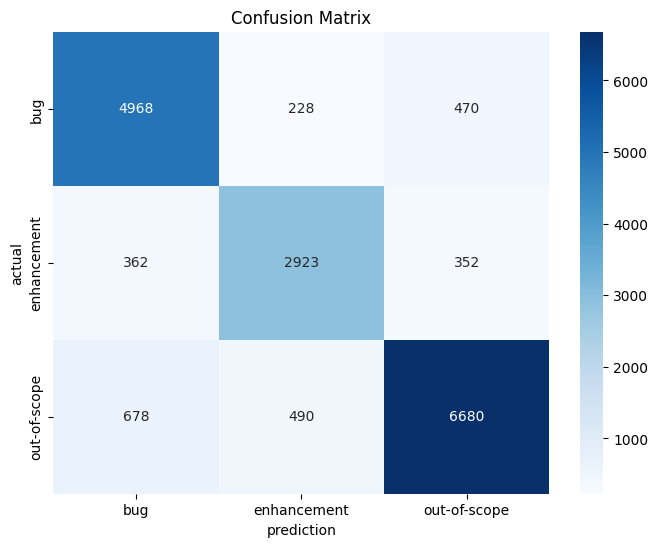

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

Performance on nlbse'22 dataset

In [23]:
train_n = pd.read_csv('data/train_clean_concat_200.csv')
test_n = pd.read_csv('data/test_clean_concat_200.csv')
print('Number of issues: ', train_n.shape, test_n.shape)

Number of issues:  (696679, 2) (80518, 2)


In [24]:
nlbse_dataset = pd.concat([train_n, test_n], ignore_index = True)
nlbse_dataset.reset_index(drop = True, inplace = True)
nlbse_dataset.shape[0]

777197

In [25]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results_n, model_outputs_n, wrong_pred_n = model.eval_model(nlbse_dataset, verbose=True, **metrics_recom)
results_n

----- roberta , duration is: 0h:28m:28s ----- 




  0%|          | 0/777197 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7772 [00:00<?, ?it/s]

{'mcc': 0.5401345503367363,
 'accuracy': 0.6939566158901798,
 'p_micro': 0.6939566158901798,
 'p_macro': 0.6435627990531881,
 'p_w': 0.8075760361312596,
 'r_micro': 0.6939566158901798,
 'r_macro': 0.6790069653850104,
 'r_w': 0.6939566158901798,
 'f_micro': 0.6939566158901798,
 'f_macro': 0.6195830586663724,
 'f_w': 0.7334728215042599,
 'classificationReport': {'0.0': {'precision': 0.8923158480489162,
   'recall': 0.6985122407633658,
   'f1-score': 0.7836089227650797,
   'support': 387966},
  '1.0': {'precision': 0.8278102307331928,
   'recall': 0.6997670238143121,
   'f1-score': 0.7584222660015929,
   'support': 323209},
  '2.0': {'precision': 0.21056231837745534,
   'recall': 0.638741631577353,
   'f1-score': 0.3167179872324446,
   'support': 66022},
  'accuracy': 0.6939566158901798,
  'macro avg': {'precision': 0.6435627990531881,
   'recall': 0.6790069653850104,
   'f1-score': 0.6195830586663724,
   'support': 777197},
  'weighted avg': {'precision': 0.8075760361312596,
   'recall':

In [26]:
model_outputs_n.shape[0]

777197

In [27]:
model_outputs_df_n = pd.DataFrame(model_outputs_n, columns = ['bug', 'enhancement', 'question'])
model_outputs_df_n.head()

,bug,enhancement,question
0,-2.078125,-2.660156,4.695312
1,-3.138672,2.171875,1.219727
2,-1.970703,0.904785,1.102539
3,1.308594,1.750977,-2.787109
4,-1.168945,3.515625,-2.007812


In [28]:
def get_prediction_question(row):
  max_value = row.max()
  if max_value == row['bug']:
    return 0
  elif max_value == row['enhancement']:
    return 1
  elif max_value == row['question']:
    return 2

In [29]:
label_names = ['bug', 'enhancement', 'question']

In [30]:
model_outputs_df_n['prediction'] = model_outputs_df_n.apply(get_prediction_question, axis = 1)
model_outputs_df_n.head()

,bug,enhancement,question,prediction
0,-2.078125,-2.660156,4.695312,2
1,-3.138672,2.171875,1.219727,1
2,-1.970703,0.904785,1.102539,2
3,1.308594,1.750977,-2.787109,1
4,-1.168945,3.515625,-2.007812,1


In [31]:
model_outputs_df_n['actual'] = nlbse_dataset['labels']

In [32]:
predicted_labels_n = model_outputs_df_n['prediction']
actual_labels_n = model_outputs_df_n['actual']

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix_n = confusion_matrix(actual_labels_n, predicted_labels_n)
print(confusion_matrix_n)

[[270999  35967  81000]
 [ 19931 226171  77107]
 [ 12773  11078  42171]]


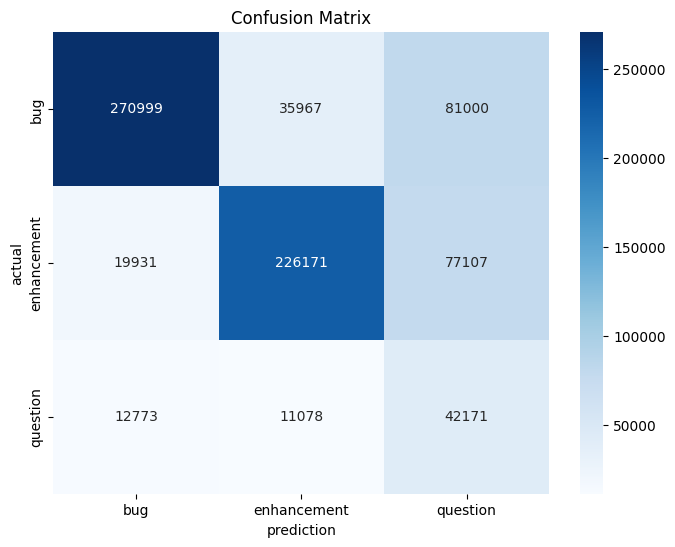

In [35]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_n,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
prediction_n = pd.DataFrame(columns = ['text', 'labels', 'actual_labels', 'prediction'])

In [37]:
prediction_n['text'] = nlbse_dataset['text']
prediction_n['labels'] = nlbse_dataset['labels']
prediction_n['actual_labels'] = model_outputs_df_n['actual']
prediction_n['prediction'] = model_outputs_df_n['prediction']
prediction_n.head()

,text,labels,actual_labels,prediction
0,time 2021-05-26T20:57:00Z author OWNER repo 0-Yama/Projet-Final-Python title the beginning body we need to add the first file of our project,1,1,2
1,time 2020-07-26T20:14:04Z author OWNER repo 0-vortex/dotfiles title better touch tool configuration body export better touch tool configuration as a separate package or submodule,1,1,1
2,time 2020-12-04T09:33:18Z author NONE repo 00-Evan/shattered-pixel-dungeon title request text when wand of regrowth starts producing furrowed grass body i was super confused when this happened. a bit of text would have helped me realize what was going on a lot sooner. the wand is getting old and the new grass is not as healthy. ?,1,1,2
3,time 2020-09-22T01:49:32Z author OWNER repo 003MattB/ScheduleBuilderImproved title update total credits when cards are removed body total credits is only updated when adding new courses but is never updated when cards are removed,0,0,1
4,time 2020-09-22T01:52:14Z author OWNER repo 003MattB/ScheduleBuilderImproved title delete course from matrix body there is no way to remove courses from the matrix once they have been added. don't forget to update the total credits see issue,1,1,1


In [38]:
prediction_n.to_csv('data/prediction_nlbse22_model_msc_bug_ench_oos_nlbse22_preprocessing.csv')

Performance on MSc dataset - bug - enhancement - question

In [39]:
train_msc = pd.read_csv('data/train_bug_ench_ques_nlbse22_preprocessing_200.csv')
test_msc = pd.read_csv('data/test_bug_ench_ques_nlbse22_preprocessing_200.csv')
print('Number of issues: ', train_msc.shape, test_msc.shape)

Number of issues:  (94830, 2) (10537, 2)


In [40]:
msc_dataset = pd.concat([train_msc, test_msc], ignore_index = True)
msc_dataset.reset_index(drop = True, inplace = True)
msc_dataset.shape[0]

105367

In [41]:
msc_dataset['labels'].value_counts()

labels
0    56661
1    36369
2    12337
Name: count, dtype: int64

In [42]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results_msc, model_outputs_msc, wrong_pred_msc = model.eval_model(msc_dataset, verbose=True, **metrics_recom)
results_msc

----- roberta , duration is: 0h:49m:50s ----- 




  0%|          | 0/105367 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1054 [00:00<?, ?it/s]

{'mcc': 0.8047773272386765,
 'accuracy': 0.8847741702810178,
 'p_micro': 0.8847741702810178,
 'p_macro': 0.8311605901591509,
 'p_w': 0.8945755476872435,
 'r_micro': 0.8847741702810178,
 'r_macro': 0.8616479302114771,
 'r_w': 0.8847741702810178,
 'f_micro': 0.8847741702810178,
 'f_macro': 0.8423807075782973,
 'f_w': 0.8879075057836648,
 'classificationReport': {'0.0': {'precision': 0.9241897838829797,
   'recall': 0.915479783272445,
   'f1-score': 0.9198141646274427,
   'support': 56661},
  '1.0': {'precision': 0.937619388729704,
   'recall': 0.8637575957546262,
   'f1-score': 0.8991742160777411,
   'support': 36369},
  '2.0': {'precision': 0.6316725978647687,
   'recall': 0.80570641160736,
   'f1-score': 0.7081537420297083,
   'support': 12337},
  'accuracy': 0.8847741702810178,
  'macro avg': {'precision': 0.8311605901591509,
   'recall': 0.8616479302114771,
   'f1-score': 0.8423807075782973,
   'support': 105367},
  'weighted avg': {'precision': 0.8945755476872435,
   'recall': 0.884

In [43]:
model_outputs_msc.shape[0]

105367

In [44]:
model_outputs_df_msc = pd.DataFrame(model_outputs_msc, columns = ['bug', 'enhancement', 'question'])
model_outputs_df_msc.head()

,bug,enhancement,question
0,4.785156,-2.322266,-2.658203
1,4.796875,-2.695312,-2.365234
2,4.820312,-2.603516,-2.439453
3,4.789062,-2.703125,-2.335938
4,4.808594,-2.396484,-2.585938


In [45]:
model_outputs_df_msc['prediction'] = model_outputs_df_msc.apply(get_prediction_question, axis = 1)
model_outputs_df_msc.head()

,bug,enhancement,question,prediction
0,4.785156,-2.322266,-2.658203,0
1,4.796875,-2.695312,-2.365234,0
2,4.820312,-2.603516,-2.439453,0
3,4.789062,-2.703125,-2.335938,0
4,4.808594,-2.396484,-2.585938,0


In [46]:
model_outputs_df_msc['actual'] = msc_dataset['labels']

In [47]:
predicted_labels_msc = model_outputs_df_msc['prediction']
actual_labels_msc = model_outputs_df_msc['actual']

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix_msc = confusion_matrix(actual_labels_msc, predicted_labels_msc)
print(confusion_matrix_msc)

[[51872  1312  3477]
 [ 2636 31414  2319]
 [ 1619   778  9940]]


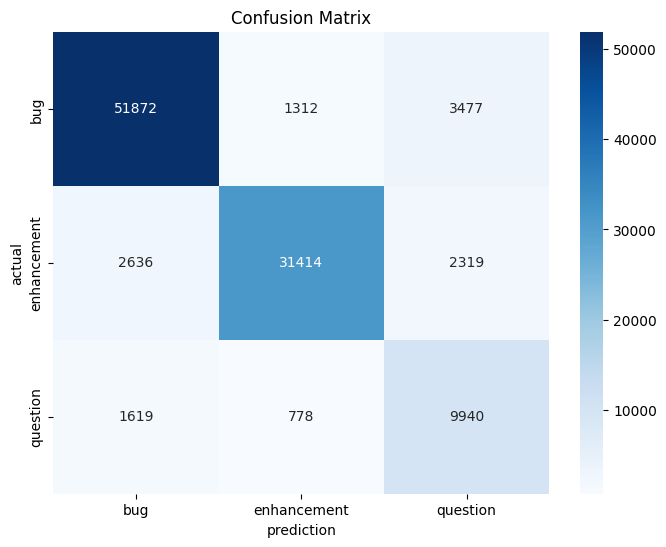

In [50]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_msc,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
prediction_msc = pd.DataFrame(columns = ['text', 'labels', 'actual_labels', 'prediction'])

In [52]:
prediction_msc['text'] = msc_dataset['text']
prediction_msc['labels'] = msc_dataset['labels']
prediction_msc['actual_labels'] = model_outputs_df_msc['actual']
prediction_msc['prediction'] = model_outputs_df_msc['prediction']
prediction_msc.head()

,text,labels,actual_labels,prediction
0,time 2020-06-01T16:01:49Z author NONE repo Anuken/Mindustry title issue with drillspeed for laserdrills body platform windows 7 build steam build 104.10 issue a water boosted laserdrill on sand displays 4.94 s but it can't supply 8 oil extractors wich only need 4.8 sand s in total. there is no overflowing sand and the oil lake on the last extractor is smaller compared to the others. for smooth designs it would be nice to get the actuall 4.94 s out of that drill image https user images.githubusercontent.com 66265700 83427216 ac0add00 a430 11ea 9ea5 026092d03b3e.png place an x no spaces between the brackets to confirm that you have read the line below. x i have searched the closed and open issues to make sure that this problem has not already been reported.,0,0,0
1,time 2020-06-03T11:25:20Z author CONTRIBUTOR repo Anuken/Mindustry title anti virus program was blocking game body platform windows 10 build 104.10 issue see screenshot image https user images.githubusercontent.com 44261958 83630982 b5827980 a5d7 11ea 8776 37f92c35799a.png download from itch.io steps to reproduce run mindustry.exe link to function used if applicable vanilla crash report if applicable nothing place an x no spaces between the brackets to confirm that you have read the line below. x i have searched the closed and open issues to make sure that this problem has not already been reported.,0,0,0
2,time 2020-06-03T14:27:30Z author CONTRIBUTOR repo Anuken/Mindustry title game crashes with a nonexistent item name in the itemdrop key in an ore. body platform android ios mac windows linux linux build the build number under the title in the main menu. required. 104.10 issue explain your issue in detail. my bug report isn't really a bug but it causes the game to crash every time you open it until you delete it out of your mod folder. the bug is that if you have an ore which has the code type oreblock itemdrop put a nonexistent item name here steps to reproduce how you happened across the issue and what you were doing at the time. create a basic mod with only a mod.json and content folder then create a blocks folder in the content folder and link to function used if applicable the mod repositories or zip files that are related to the issue. nichrosia bugtest crash report if applicable the contents of relevant crash report files. crash report is in the repository place an x no spaces between the brackets to confirm that you have read the line below. x i,0,0,0
3,time 2020-06-03T17:50:49Z author NONE repo Anuken/Mindustry title graphical bug with legged units body platform windows build latest bleeding edge issue there's a graphical bug where the cix's body will render on top of a ground unit but its legs will render underneath it making the unit look like it's floating and overall looking strange. steps to reproduce create a cix control it and walk over a ground unit. place an x no spaces between the brackets to confirm that you have read the line below. x i have searched the closed and open issues to make sure that this problem has not already been reported.,0,0,0
4,time 2020-06-06T11:06:07Z author NONE repo Anuken/Mindustry title multiplayer incompatibilities due to mismatched versions posted on different platforms body platform android ios steam build android 104.6 ios 104.4 steam 104.10 issue trying to play multiplayer cross platform with my friend is impossible due to the build mismatches explained above. steps to reproduce download the app from ios and get the version stated directly from the app store. download the steam version and get the version stated directly from steam. optional download the android version and get the version stated directly from android. attempt to play multiplayer with the other platforms locally or not. link to function used if applicable this is not a mod issue. crash report if applicable there are no logs this is an issue with a version mismatch. edit removed an extra on the platform section. 

In [53]:
prediction_msc.to_csv('data/prediction_msc_bug_ench_question_model_msc_bug_ench_oos_nlbse22_preprocessing.csv')